This takes the some available categorical features in the original wildfire dataset (fire start month and state) for some visualizations.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from matplotlib.pyplot import text
import calendar


Intel(R) Data Analytics Acceleration Library (Intel(R) DAAL) solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


In [2]:
X = pd.read_pickle('wildfire_encoded_data.pkl')
y = pd.read_pickle('wildfire_encoded_labels.pkl')

In [3]:
X.head()

,DISCOVERY_DATETIME,STATE
0,2,4.0
1,5,4.0
2,5,4.0
3,6,4.0
4,6,4.0


In [4]:
y.head()

0     22.00
1     22.25
2     21.45
3    132.00
4    128.00
Name: TIME_TO_CONT, dtype: float64

Now let's take a very basic, visual look at the distribution.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 20);

In [6]:
X_train_feat = np.array(X_train['DISCOVERY_DATETIME']).reshape(-1,1)


([<matplotlib.axis.XTick at 0x7f83b1434cf8>,
 <a list of 12 Text xticklabel objects>)

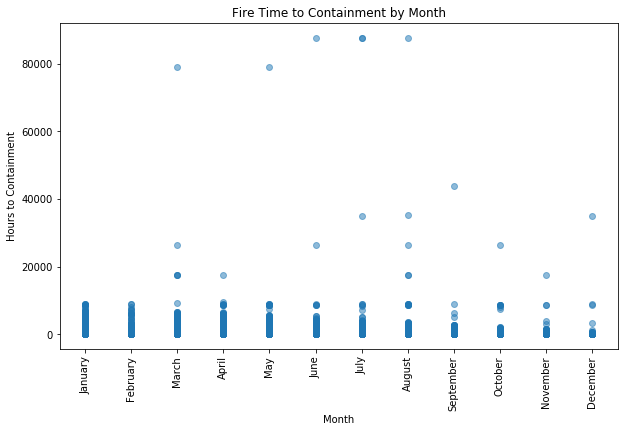

In [7]:
plt.figure(figsize=(10,6));
X_train_feat = np.array(X_train['DISCOVERY_DATETIME']).reshape(-1,1)
plt.scatter(X_train_feat, y_train, alpha = 0.5, label="Training")
plt.title("Fire Time to Containment by Month")
plt.xlabel("Month")
plt.ylabel('Hours to Containment')
plt.xticks(np.arange(1,13), calendar.month_name[1:13], rotation=90)



In [8]:
plt.figure(figsize=(16,8));
X_train_feat = np.array(X_train['STATE']).reshape(-1,1)
X_test_feat = np.array(X_test['STATE']).reshape(-1,1)
plt.scatter(X_train_feat, y_train, alpha=0.5, label="Training")
plt.title("Fire Time to Containment by U.S. State")
plt.xlabel("State")
plt.ylabel('Hours to Containment')
plt.xticks(np.arange(52), ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
        'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])


NameError: name 'rand_jitter' is not defined

<Figure size 1152x576 with 0 Axes>

In [128]:
X = pd.read_pickle('wildfire_area_encoded_data.pkl')
y = pd.read_pickle('wildfire_area_encoded_labels.pkl')

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 20);

In [130]:
X_train.head()

,DISCOVERY_DATETIME,STATE
1247730,7,NaN
236076,7,45.0
1405504,5,NaN
1340393,7,NaN
10099,4,5.0


([<matplotlib.axis.YTick at 0x7fcbb18035f8>,
 <a list of 7 Text yticklabel objects>)

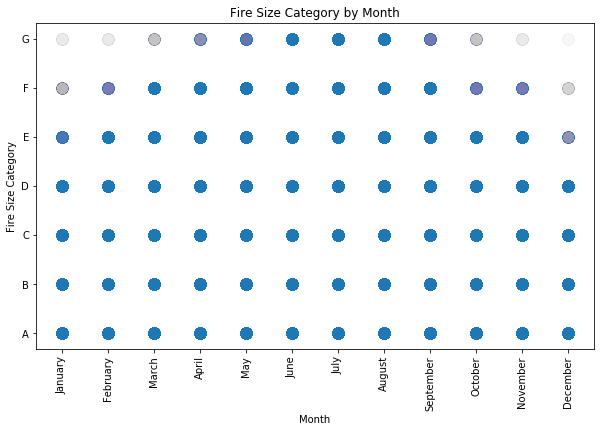

In [131]:
plt.figure(figsize=(10,6));
X_train_feat = np.array(X_train['DISCOVERY_DATETIME']).reshape(-1,1)
plt.scatter(X_train_feat, y_train, s=150, alpha=0.005, label="Training")
plt.title("Fire Size Category by Month")
plt.xlabel("Month")
plt.ylabel('Fire Size Category')
plt.xticks(np.arange(1,13), calendar.month_name[1:13], rotation=90)
plt.yticks(np.arange(1, 8), ['A', 'B', 'C', 'D', 'E', 'F', 'G'])


In [132]:
np.array(y_train)

array([2, 2, 2, ..., 1, 1, 1])

<Figure size 720x720 with 0 Axes>

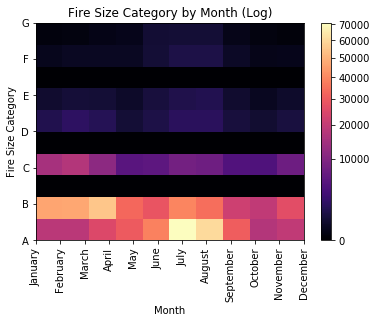

In [133]:
plt.figure(figsize=(10,10));
fig, ax = plt.subplots()
plt.set_cmap('magma')
import matplotlib.colors as mcolors
gamma = 0.5

h = plt.hist2d(X_train_feat.transpose()[0], np.array(y_train),  norm=mcolors.PowerNorm(gamma))

plt.title("Fire Size Category by Month (Log)")
plt.xlabel("Month")
plt.ylabel('Fire Size Category')
plt.xticks(np.arange(1,13), calendar.month_name[1:13], rotation=90)
plt.yticks(np.arange(1, 8), ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
fig.colorbar(h[3], ax=ax)

<Figure size 720x720 with 0 Axes>

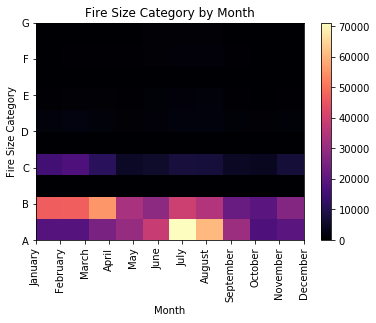

In [134]:
plt.figure(figsize=(10,10));
fig, ax = plt.subplots()
plt.set_cmap('magma')
import matplotlib.colors as mcolors
gamma = 0.5

h = plt.hist2d(X_train_feat.transpose()[0], np.array(y_train))

plt.title("Fire Size Category by Month")
plt.xlabel("Month")
plt.ylabel('Fire Size Category')
plt.xticks(np.arange(1,13), calendar.month_name[1:13], rotation=90)
plt.yticks(np.arange(1, 8), ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
fig.colorbar(h[3], ax=ax)

In [ ]:
X_tr

([<matplotlib.axis.XTick at 0x7fcbad97d1d0>,
 <a list of 52 Text xticklabel objects>)

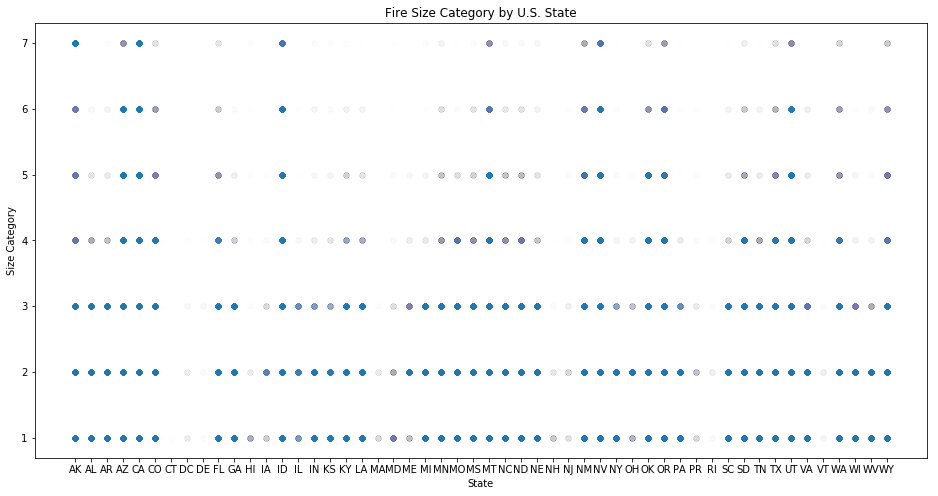

In [68]:
plt.figure(figsize=(16,8));
X_train_feat = np.array(X_train['STATE']).reshape(-1,1)
plt.scatter(X_train_feat, y_train, alpha=0.005, label="Training")
plt.title("Fire Size Category by U.S. State")
plt.xlabel("State")
plt.ylabel('Size Category')
plt.xticks(np.arange(52), ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
        'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])

In [108]:
#We do have to remove nans for this visualization

X_train_feat = np.array(X_train['STATE']).reshape(-1,1)
xp = np.logical_not(np.isnan(X_train_feat))
X_train_feat = X_train_feat[xp]
y_train = np.array(y_train).transpose()


In [109]:
y_train = y_train.reshape(1,-1)

In [113]:
y_train = y_train[xp.transpose()]

In [117]:
len(X_train_feat)

347722

In [118]:
len(y_train)

347722

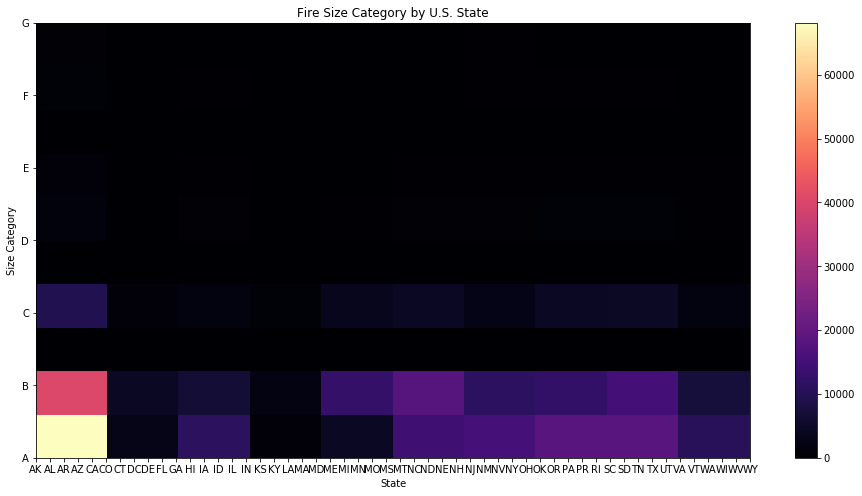

In [124]:
fig, ax = plt.subplots(figsize=(16,8))

h = plt.hist2d(X_train_feat, y_train)

plt.title("Fire Size Category by U.S. State")
plt.xlabel("State")
plt.ylabel('Size Category')
plt.xticks(np.arange(52), ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
        'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])
plt.yticks(np.arange(1, 8), ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

fig.colorbar(h[3], ax=ax)

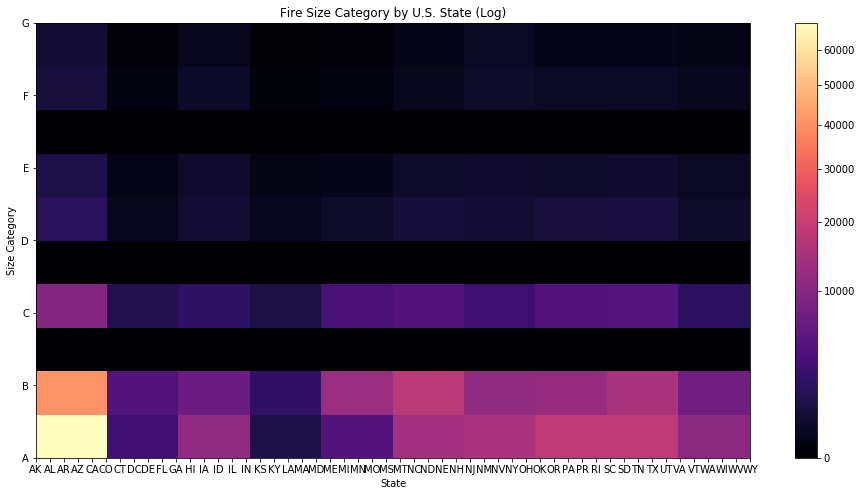

In [126]:
gamma = 0.5
fig, ax = plt.subplots(figsize=(16,8))

h = plt.hist2d(X_train_feat, y_train, norm=mcolors.PowerNorm(gamma))

plt.title("Fire Size Category by U.S. State (Log)")
plt.xlabel("State")
plt.ylabel('Size Category')
plt.xticks(np.arange(52), ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
        'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])
plt.yticks(np.arange(1, 8), ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

fig.colorbar(h[3], ax=ax)

